In [1]:
from helper_functions import *
import seaborn as sns

# dataset description
* "time" -- records the date and time of production
* "green -- bar was green("1") or not green("0")
* rest are oompa-loompdas names

In [76]:
df = pd.read_csv("../data/Scrumpulicious.csv")
y = df['GREEN']

In [77]:
from sklearn.feature_extraction import DictVectorizer
use_time = True
if use_time:
    to_vec=[]
    for i in df['TIME']:
        t = time.strptime(i, '%Y-%m-%d %H:%M:%S')
        to_vec.append({"day": t.tm_mday,"hour": t.tm_hour, "min": t.tm_min})

    vec = DictVectorizer()
    time_ = vec.fit_transform(to_vec).toarray()
    time_ = pd.DataFrame(time_)
    time_.columns = ['day', 'hour', 'minute']
    df = pd.concat([time_, df],  axis=1)
df = df.drop(['TIME','GREEN'], axis=1)

In [78]:
df.tail()

,day,hour,minute,PIB,MOZ,NOL,ZEN,SIP,MAZ,FOK,...,FUG,NIT,SIM,DUB,ZIR,RUP,LEM,GIS,POF,SUG
15801,3.0,2.0,58.0,-0.75971,-0.75543,-0.20645,-103.86804,-0.05024,13.72655,0.16634,...,25.72803,0.15707,-0.8235,-2.29603,-0.00440,5.82365,0.20666,-0.00706,0.96213,-0.01240
15802,3.0,3.0,0.0,-0.73075,-0.60813,-0.28543,-102.27720,-0.06322,13.40202,0.16634,...,25.72803,0.15707,-0.8235,-2.29682,-0.00032,6.06426,0.21999,-0.00734,0.18836,-0.01239
15803,3.0,3.0,2.0,-0.71565,-0.43238,-0.16995,-103.61989,-0.07621,13.07750,0.16634,...,25.72803,0.15707,-0.8235,-2.29761,-0.00178,6.06426,0.33864,-0.00920,0.66709,-0.01238
15804,3.0,3.0,4.0,-0.71244,-0.40285,-0.19671,-104.14266,-0.08921,12.75297,0.16634,...,25.72803,0.15707,-0.8235,-2.29841,-0.00137,6.06426,0.20666,-0.00890,1.49408,-0.01238
15805,3.0,3.0,6.0,-0.72814,-0.55974,-0.30143,-104.66540,-0.10220,12.89804,0.16634,...,25.72803,0.15707,-0.8235,-2.29920,-0.00090,6.06426,0.17587,-0.00860,0.45008,-0.01237


### Checking for correlation between columns


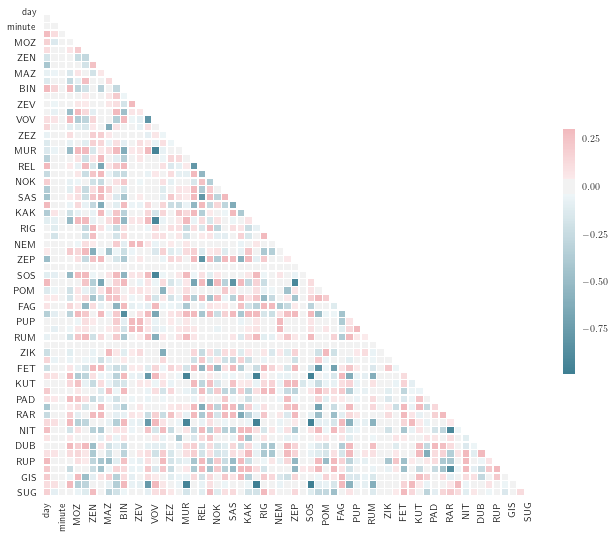

In [79]:
corr_heatmap(df)

### Checking for correlation between columns AFTER getting rid of some columns


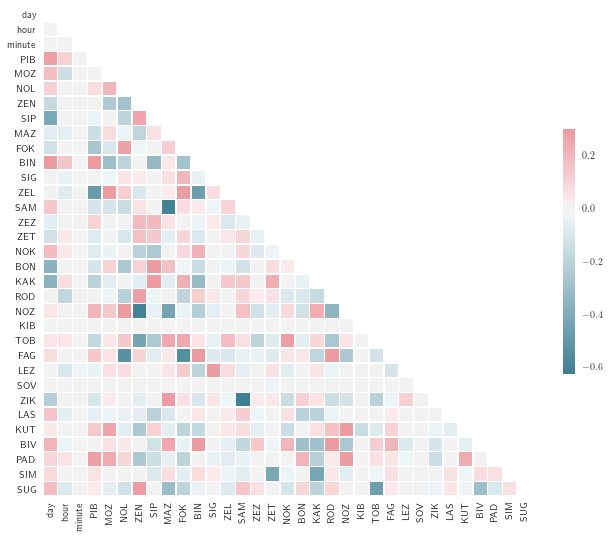

In [80]:
uncorr_df = correlation(df, 0.4)
X = np.array(uncorr_df)
corr_heatmap(uncorr_df)

# Checking if any columns are from the normal distribution

In [81]:
a = [st.normaltest(X[:,i])[1] for i in range(X.shape[1])]
alpha = 0.05
print((np.array(a)<alpha).all())

True


#### Hence non are from the normal distribution

## Using PCA to preview the data

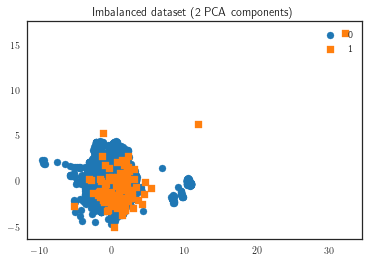

In [82]:
X_pca = standardize_data(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

------

# Training and building models
   Using SVM and Random Forest classifiers
    1. On an imbalanced dataset 
    2. On a balanced dataset using oversampling techinques

# Imbalanced dataset

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


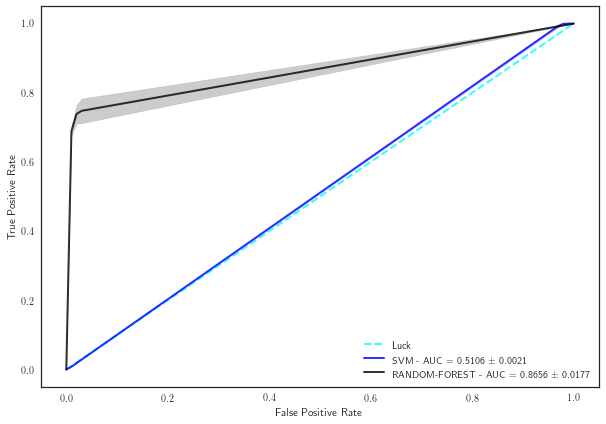

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,SVM,0.9935468+/-0.0000007,0.0+/-0,0.0+/-0,0.9967629+/-0.0000004,0.001,10
0,RANDOM-FOREST,0.9954+/-0.0005,0.92+/-0.13,0.324+/-0.029,0.9944+/-0.0006,8.000,100


In [83]:
SVM_1_performance, SVM_1_roc = model(X, y,
                                     n_splits=3, seed=42,
                                     model_name='SVM',
                                    over_sampling = False)
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = False)
plot_roc([SVM_1_roc, RM_1_roc])
result = pd.concat([SVM_1_performance, RM_1_performance])
result

The performance is quite poor, let's try to use sampling techniques to better train our model

# balanced (oversampled) dataset
#### dropping SVM as it has really poor results, but on the other hand Random Forst reduces overfitting 
1.  First using cross validation, I will gry to get the best hyperparamters
2. Using the best hyperparamters, I will train a seperate model. This require the right approach to over sampling. Where we have a hold out test set

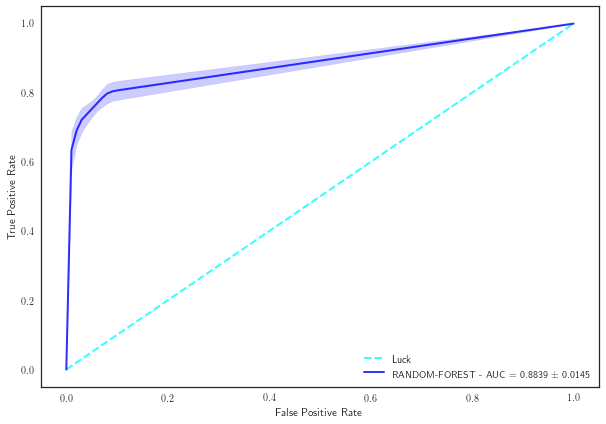

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,RANDOM-FOREST,0.9941+/-0.0010,0.59+/-0.12,0.363+/-0.017,0.9935+/-0.0008,8,100


In [84]:
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = True)
plot_roc([ RM_1_roc])
RM_1_performance

## Correct way to oversampling knowing the best hyperparameters

In [85]:
X = standardize_data(X)

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority')

In [87]:
# First split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

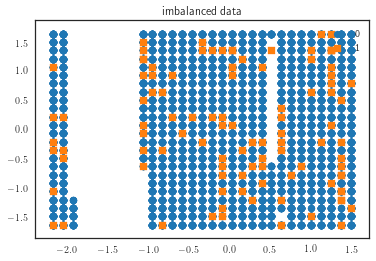

In [88]:
plot_2d_space(X, y, 'imbalanced data')

In [89]:
# Then split again to oversample only on the training
# not on the validation nore test set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#over-sample
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(np.unique(y_train_res, return_counts=True))

(array([0, 1]), array([6591, 6591]))


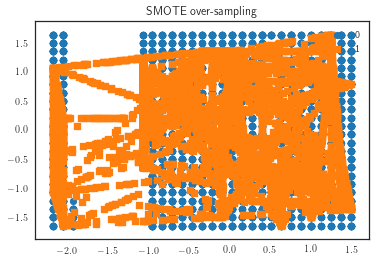

In [90]:
plot_2d_space(x_train_res, y_train_res, 'SMOTE over-sampling')

In [91]:
#TRAIN
clf_rf = RandomForestClassifier(n_estimators = 100,
                                max_depth = 2,
                                random_state= 42)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
#X_test, y_test = sm.fit_sample(X_test, y_test)


In [93]:
#metrics
#X_test, y_test = sm.fit_sample(X_test, y_test)
print ('Validation Results')
y_pred_val = clf_rf.predict(X_val)
print ("accuracy: ", clf_rf.score(X_val, y_val))
print ("recll: ",recall_score(y_val, clf_rf.predict(X_val)))
print("classification report:",classification_report(y_val, y_pred_val)) 

print ('\nTest Results')
y_pred_test = clf_rf.predict(X_test)
print ("accuracy: ", clf_rf.score(X_test, y_test))
print ("recll: ", recall_score(y_test, clf_rf.predict(X_test)))
print("classification report:",classification_report(y_test, y_pred_test)) 

Validation Results
accuracy:  0.8611599297012302
recll:  0.8125
classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.93      2829
           1       0.03      0.81      0.06        16

   micro avg       0.86      0.86      0.86      2845
   macro avg       0.52      0.84      0.49      2845
weighted avg       0.99      0.86      0.92      2845


Test Results
accuracy:  0.8609837102641151
recll:  0.7435897435897436
classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.92      6284
           1       0.03      0.74      0.06        39

   micro avg       0.86      0.86      0.86      6323
   macro avg       0.52      0.80      0.49      6323
weighted avg       0.99      0.86      0.92      6323



# saving model

In [94]:
from sklearn.externals import joblib
filename = '../data/finalized_model.sav'
joblib.dump(clf_rf, filename)
 
 

['../data/finalized_model.sav']

In [95]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8609837102641151
